# Sale Price for apartments by Linear Regression

Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.
- цена продажи (SalePrice, зависимая переменная),
- наземная жилая зона (GrLivArea),
- общее качество (Overall Quality),
- территория гаража (GarageArea),
- условия сделки (SaleCondition).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем дата сет

In [29]:
df=pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/6057149/attachment/dcab3617fbc87c12cb7c8aa32e38c163.csv')
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


Пропуски отсутствуют. Столбец SaleCondition и Street - не числовой.

In [31]:
df.describe()

,SalePrice,GrLivArea,GarageArea,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,472.980137,6.099315
std,79442.502883,525.480383,213.804841,1.382997
min,34900.000000,334.000000,0.000000,1.000000
25%,129975.000000,1129.500000,334.500000,5.000000
50%,163000.000000,1464.000000,480.000000,6.000000
75%,214000.000000,1776.750000,576.000000,7.000000
max,755000.000000,5642.000000,1418.000000,10.000000


In [32]:
def show_joinplot(title='Зависимость цены от жилой зоны', x='GrLivArea'):
  print(title)
  sns.jointplot(data=df, x=x, y='SalePrice', kind='reg', height=12, ratio=4)
  plt.xlabel(x)
  plt.ylabel('SalePrice')
  plt.title(title)
  plt.show();

Зависимость цены от жилой зоны


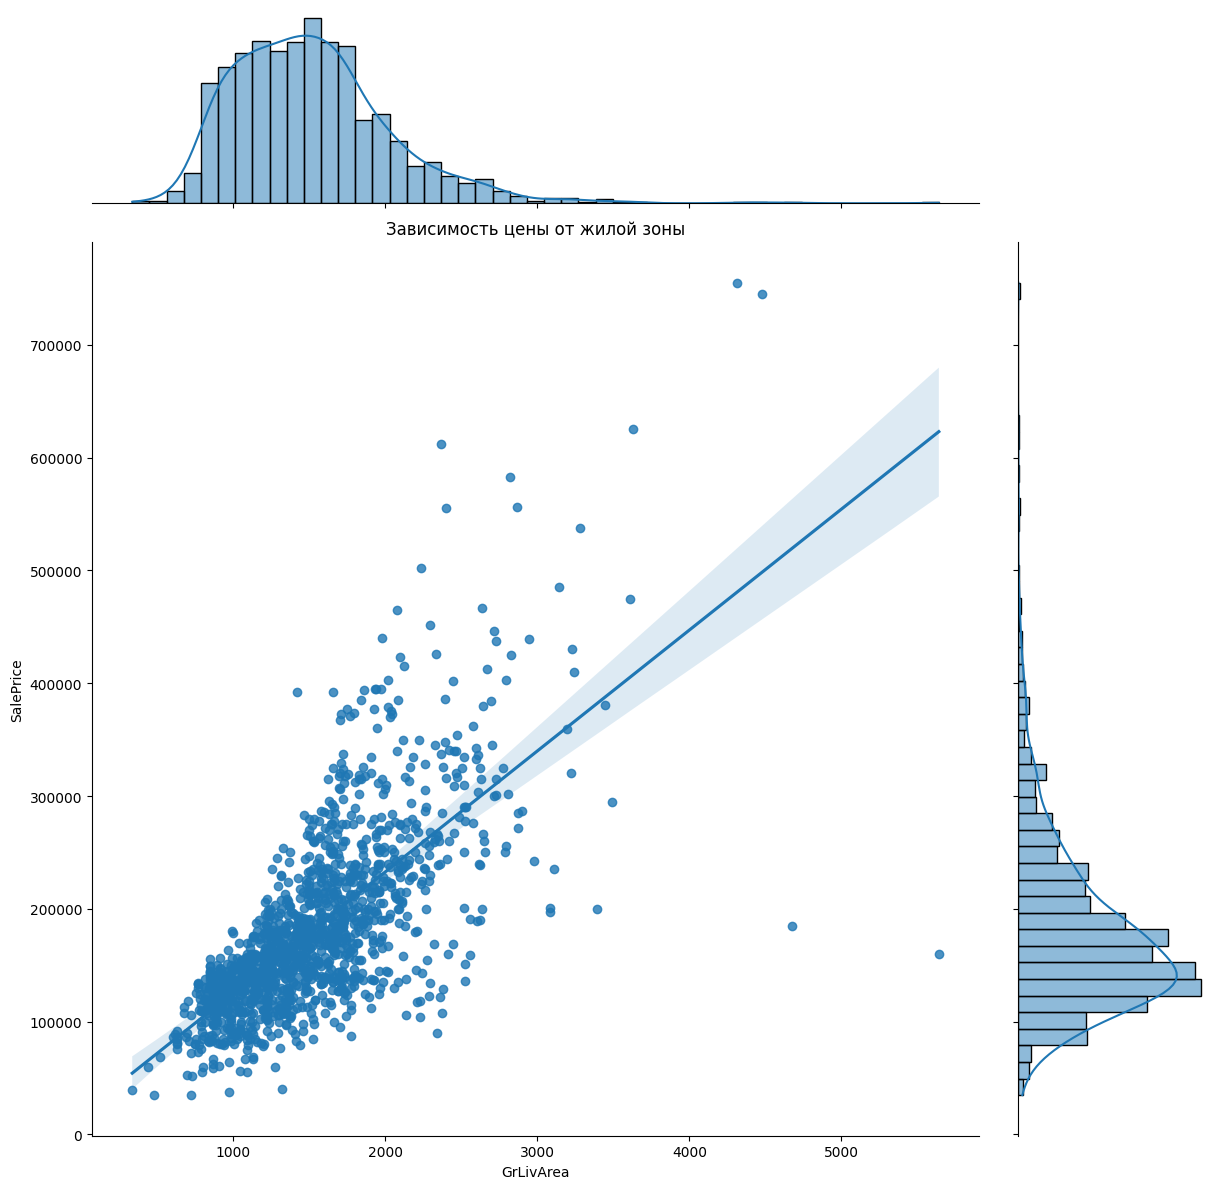

In [33]:
show_joinplot()

Зависимость цены от площади гаража


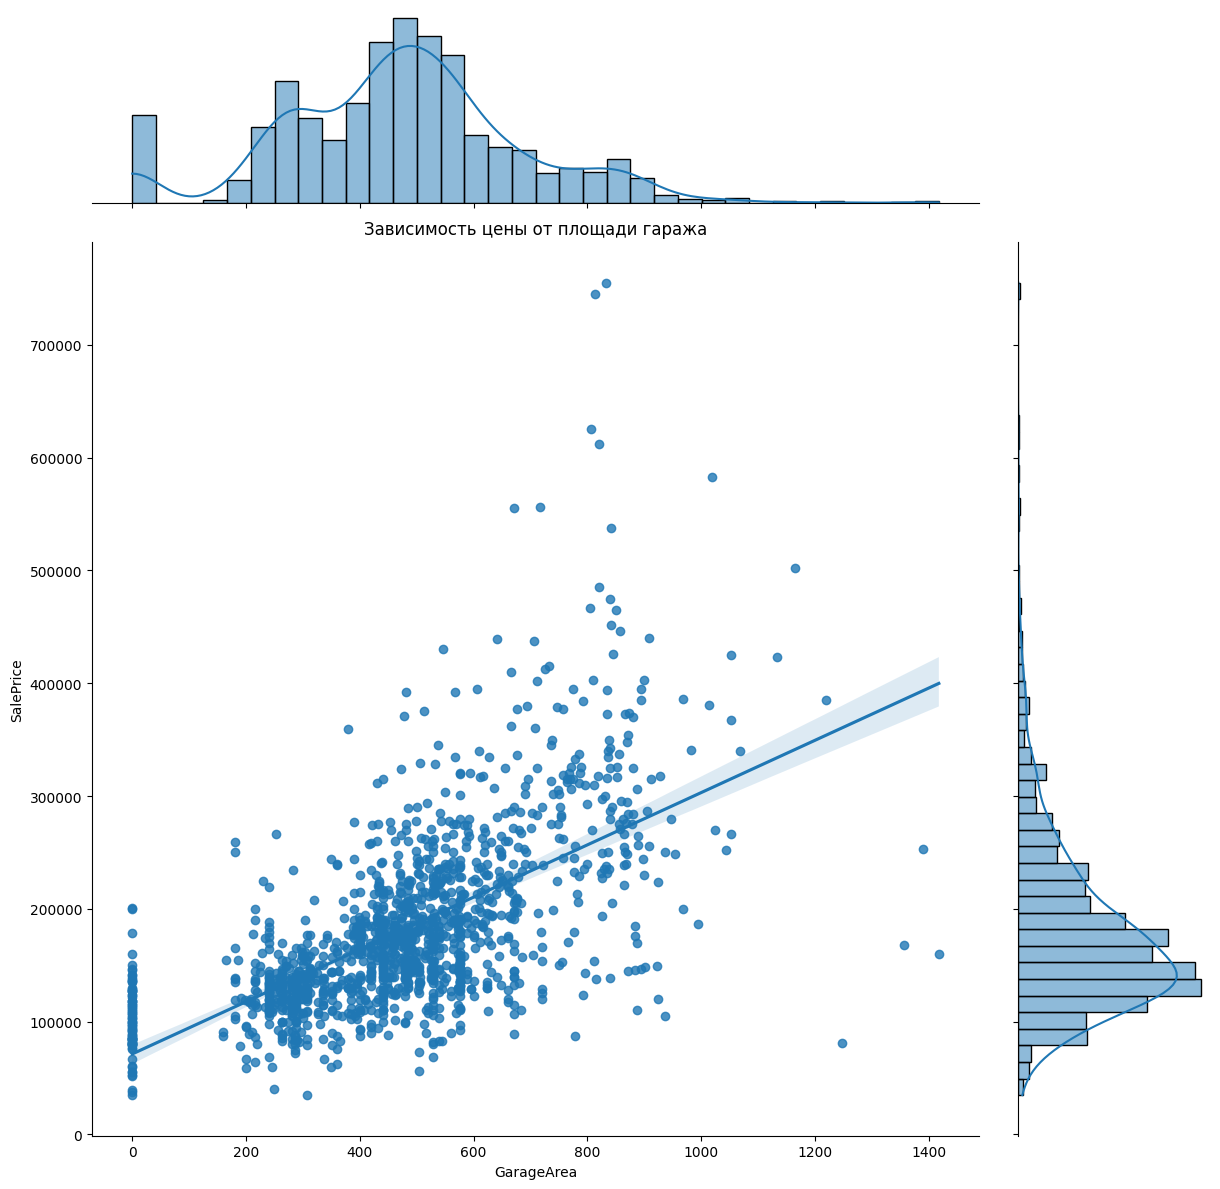

In [34]:
show_joinplot(title='Зависимость цены от площади гаража', x='GarageArea')

Зависимость цены от общего качества


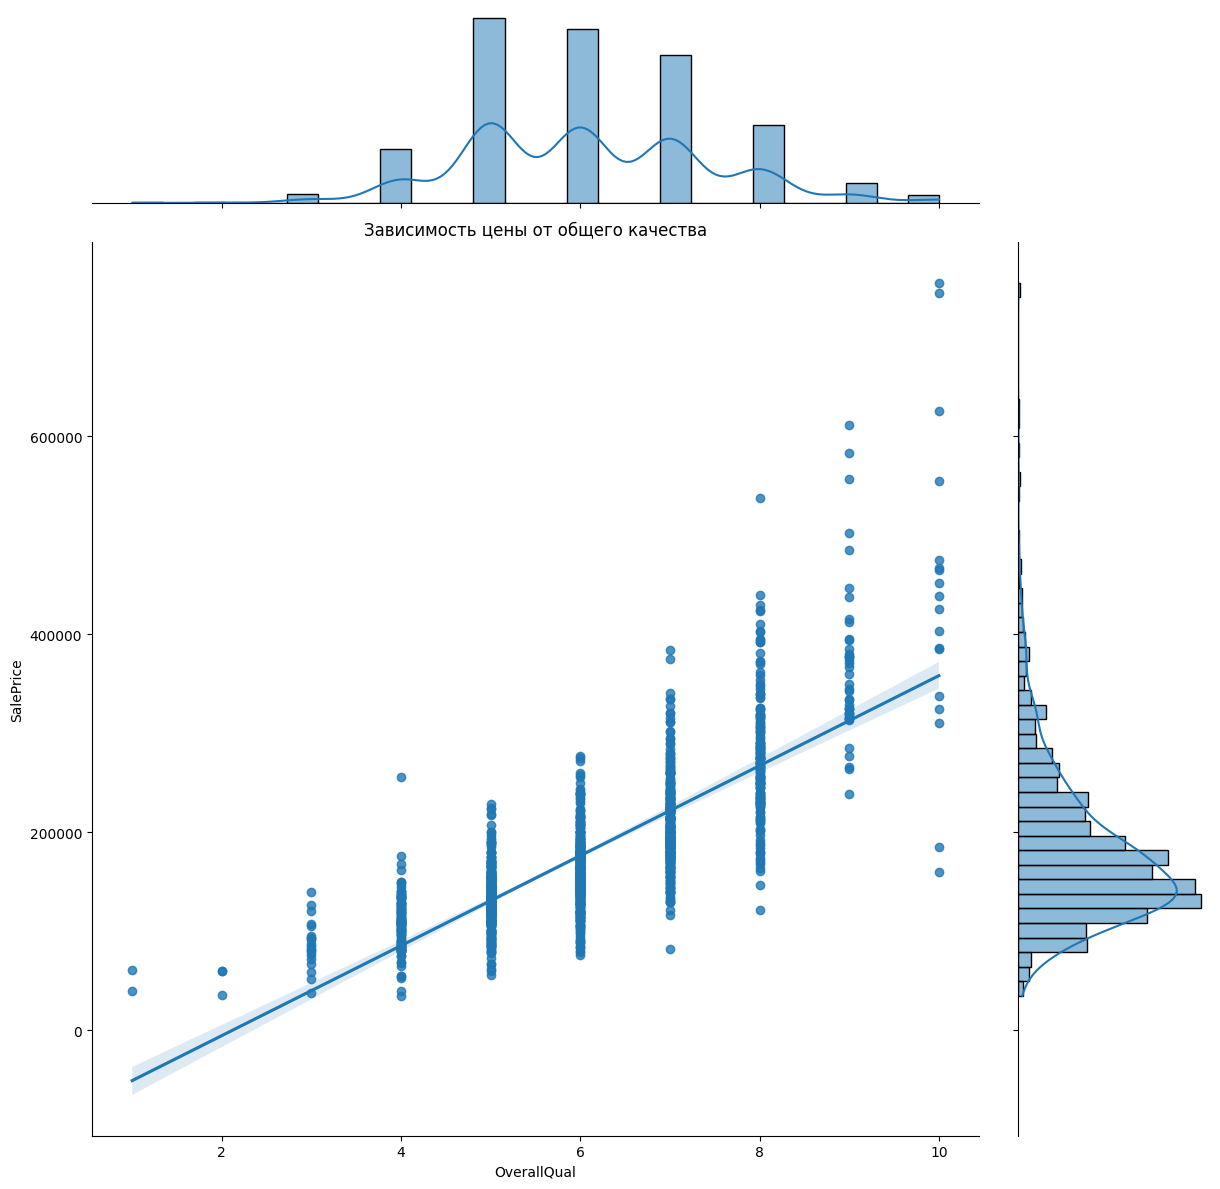

In [35]:
show_joinplot(title='Зависимость цены от общего качества', x='OverallQual')

Разделим датасет на обучающую и тестовую выборки.

In [36]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

Построение модели

In [37]:
model=LinearRegression().fit(train[['GrLivArea', 'OverallQual', 'GarageArea']], train['SalePrice'])

# Параметры модели

In [38]:
print('Коэффициенты модели: ', model.coef_)
print('Свободный член модели: ', model.intercept_)

Коэффициенты модели:  [   45.95438225 27772.56853787    74.79602669]
Свободный член модели:  -94384.52384295818


# Результаты предсказаний на обучающей и тестовой выборках

In [39]:
y_predict_train=model.predict(train[['GrLivArea', 'OverallQual', 'GarageArea']])
y_predict_test=model.predict(test[['GrLivArea', 'OverallQual', 'GarageArea']])

# Оценка качества модели

In [40]:
def show_metrics(title='обучающей', y_predict=y_predict_train, y_train=train['SalePrice']):
  print(f'MAE на {title} выборке: ', mean_absolute_error(y_train, y_predict))
  print(f'MSE на {title} выборке: ', mean_squared_error(y_train, y_predict))

In [41]:
show_metrics()

MAE на обучающей выборке:  26695.56507243098
MSE на обучающей выборке:  1606217852.3585093


In [42]:
show_metrics(title='тестовой', y_predict=y_predict_test, y_train=test['SalePrice'])

MAE на тестовой выборке:  27163.188000430473
MSE на тестовой выборке:  1813348452.946009


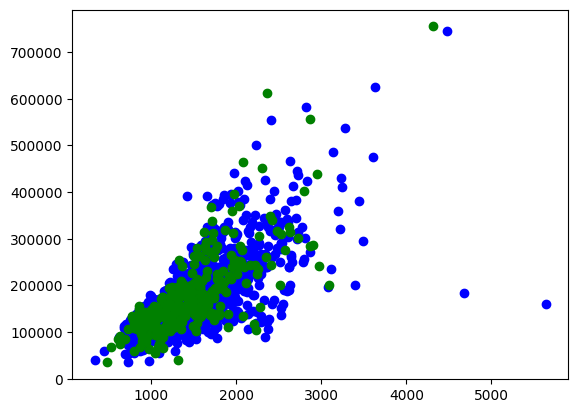

In [43]:
plt.scatter(train['GrLivArea'], train['SalePrice'], color='blue', label='Обучающая выборка')
plt.scatter(test['GrLivArea'], test['SalePrice'], color='green', label='Тестовая выборка')

## ВЫВОД

Полученные значения метрик модели получились ботльшими из-за больших значений целевой переменной. Но на фоне целевой переменной метрики не такие уж большие. Для большей наглядности и уменьшения необходимой вычислительной мощности лучше перед построением модели провести нормолизацию признаков и целевой переменной.

Датасет имеет не так уж много строк (1460), что в итоге и отразилось на величине ошибки.
